# Time series analysis of 4 most traded market index prices.

- In this project i am going to deal time series data where order of the data matter.
- Notation that i am going to use to denote certain event are X, T, t
- Where X represent Index prices. T represent total time period of data availble and t represent a specific time in duration of T.
- X(t) represent index price of portfolio at time t.
- This t can be anything it can a day, week, month, a business day, year, quarter, second, minute, hours, etc.
- Since we are dealing with stock price so 't' will represent business days.
---
- our main purpose of this project is to explore all the statistical model, which will predict stock price more acurately.
- and exploration of statistical properties of time series data

### Import the Packages

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
import scipy
sns.set()

### Importing the Data

In [49]:
raw_index_data=pd.read_csv('Index2018.csv')

In [50]:
df_index=raw_index_data.copy()

### Examining the Data

In [51]:
df_index.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


#### ***Descriptive Statistics***

In [52]:
df_index.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [53]:
df_index.date=pd.to_datetime(df_index.date,dayfirst=True)

In [54]:
df_index.date.describe()

C:\Users\adadi\AppData\Local\Temp/ipykernel_7400/656102556.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_index.date.describe()


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

- This data frame contains 4 most traded market index in the world.
- Those are
  1. S&P 500-(spx) (usa)
  2. Dax 30 -(dax) (germany)
  3. Ftse 100-(ftse) (uk)
  4. Nikkei 253-(nikkei) (Japan)
- **Observation**
- This Dataframe contains every business day price data of these four market indices from 1994-01-07 to 2018-01-29.
- spx index has minimum mean and standard deviation compared to indices.
- Nikkei index has  maximum mean and standard deviation in comparision to others.
- Even maximum value of spx and Nikkei has lowest and highest stock price compared to others respectively.

### Plotting the Data

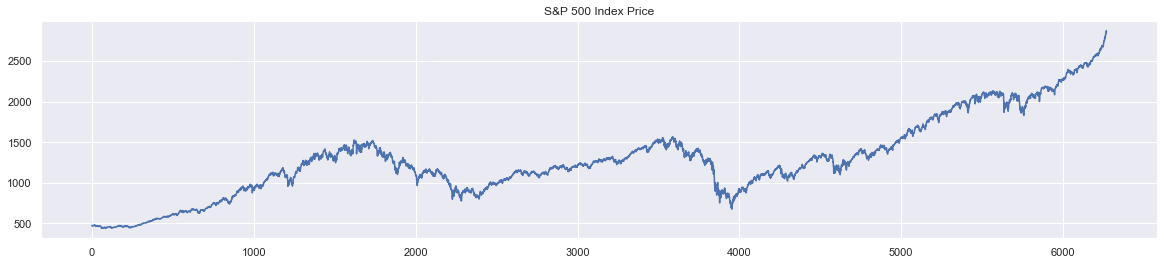

In [55]:
df_index.spx.plot(title="S&P 500 Index Price",figsize=(20,4))
plt.show()

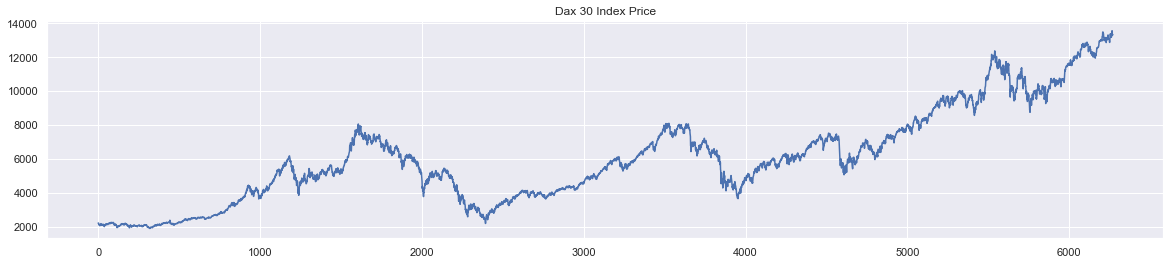

In [56]:
df_index.dax.plot(title="Dax 30 Index Price",figsize=(20,4))
plt.show()

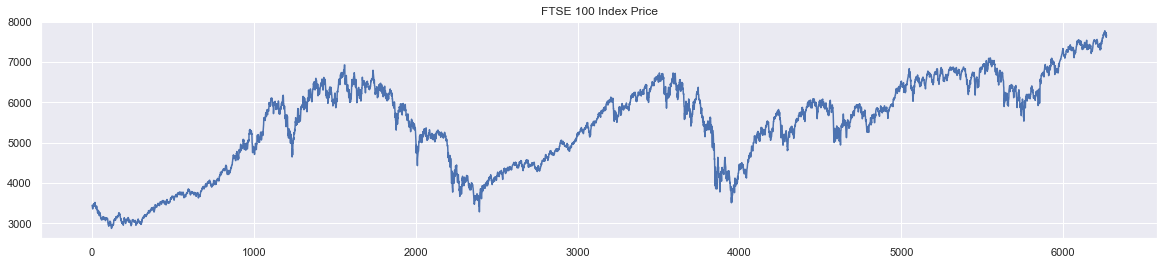

In [57]:
df_index.ftse.plot(title="FTSE 100 Index Price",figsize=(20,4))
plt.show()

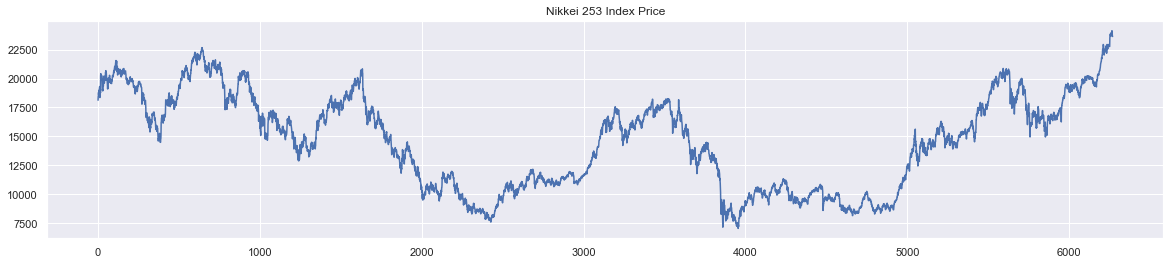

In [58]:
df_index.nikkei.plot(title="Nikkei 253 Index Price",figsize=(20,4))

plt.show()

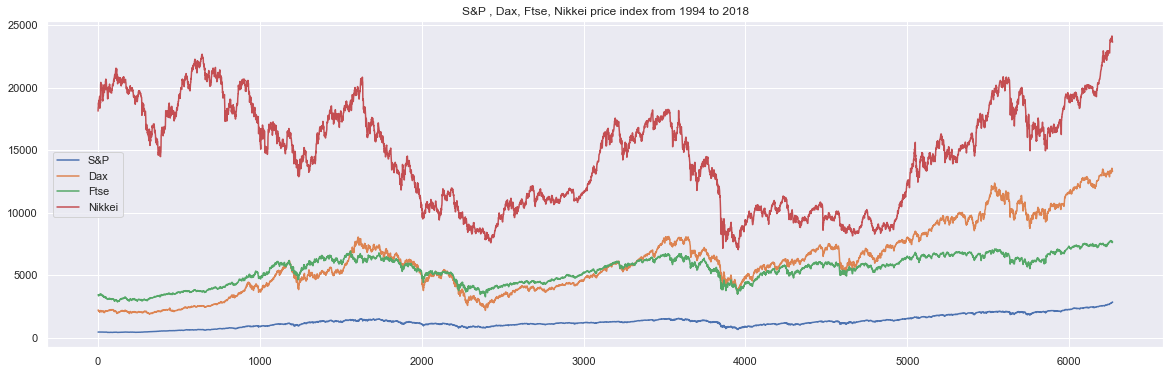

In [59]:
plt.figure(figsize=(20,6))
df_index.spx.plot()
df_index.dax.plot()
df_index.ftse.plot()
df_index.nikkei.plot()
plt.title('S&P , Dax, Ftse, Nikkei price index from 1994 to 2018')
plt.legend(['S&P','Dax','Ftse','Nikkei'])
plt.show()

#### ***Observation from graph***
- By observing stock price of each market index it can be stated that Nikkei index has higher variance and S&P has minimum but it is wrong since Nikkei price is usally much higher than S&P.
- if we observe S&P index price carefully we can see two bubble which are nothing but dot com bubble and housing market bubble that started in USA.
- This buble lead to stock market crash in 2003 and 2008 respectively.
- Dax and Ftse market index has similar market trends but after 2008 housing market crash the gap between these market index increased. it also means that Dax market index performing well in comparision to FTSE market index.
- Dot com bubble and house market bubble in usa also has affected Nikkei market index as well cause in 2003 and 2008 Nikkei price catch all time low values.
- So this market crash in america has affected market index of other country like Japan, Germany, UK as well. 

### The QQ Plot

#### ***Characteristics of the QQ plots***
- This Plot is used to find similarity between two distribution of data.
- Using this plot we can find data point which most likly to occur.
- X axis of this graph  reprsent no of standard deviation away from mean.
- Y axis reprsent data which is being compared itself.
- Diagonal line represent expected alignment of given data if data has exact same distribution as the distribution with which it is being compared
- In this project i am going to compared price of each market index with normal distribution.

In [60]:
import scipy.stats
import pylab

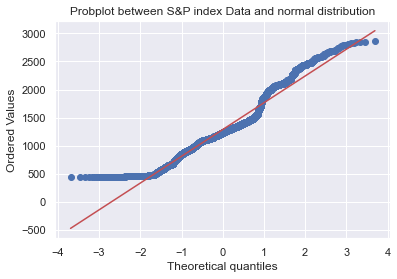

In [61]:
scipy.stats.probplot(df_index.spx,plot=pylab)
pylab.title('Probplot between S&P index Data and normal distribution')
pylab.show()

#### ***Observation***
- From the above graph it is observed that spx data is completely normally distributed cause price around 500 are situated far away from diagonal line.
- mean value are around 1500
- standard deviation is around 500.
- and this observation is also evident from spx columns of descriptive statistics table.

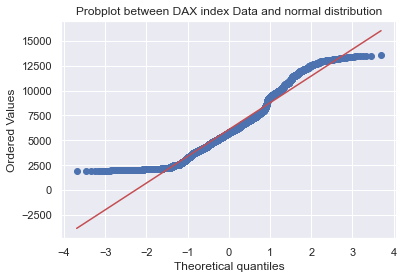

In [62]:
scipy.stats.probplot(df_index.dax,plot=pylab)
pylab.title('Probplot between DAX index Data and normal distribution')
pylab.show()

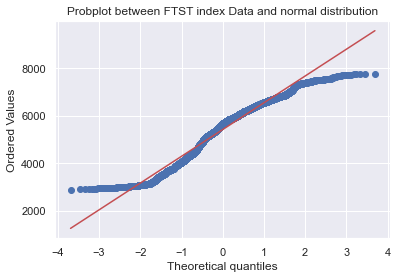

In [63]:
scipy.stats.probplot(df_index.ftse,plot=pylab)
pylab.title('Probplot between FTST index Data and normal distribution')
pylab.show()

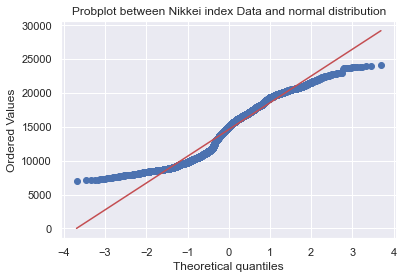

In [64]:
scipy.stats.probplot(df_index.nikkei,plot=pylab)
pylab.title('Probplot between Nikkei index Data and normal distribution')
pylab.show()

#### ***Observation***
- By observing above graph it is clear that none of the market index price has normal distribution.
- Since it dose not have normal distribution then normal distribution based statistical model can not be used here to predict future stock price.

### ***Data Transformation***

- Date transformation is already done.
- setting date columns as index column.
- Since we want to predict future stock price by using price of previous days. So price value of each business days should be present in the dataframe.

### ***Setting desire frequency as 'Business days(b)'***

In [65]:
df_index.set_index('date',inplace=True)

In [66]:
df_index=df_index.asfreq('b')

In [67]:
df_index.shape

(6277, 4)

### ***finding null values***

In [68]:
df_index.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

#### ***Filling Missing Value***
- Since we considering stock price data in each business day from 1994 to 2018, So this data frame has 8 business days in which no data has been recorded.
- to fill those missing value i am going to use front filling, back filling and assinging same value to all missing value of the frame. But assigning missing value with same value is not great idea cause in time series data previous value affect current value and current value affect next.

In [69]:
df_index.spx.fillna(method='ffill',inplace=True)
df_index.ftse.fillna(method='bfill',inplace=True)
df_index.dax.fillna(df_index.dax.mean(),inplace=True)
df_index.nikkei.fillna(df_index.nikkei.median(),inplace=True)

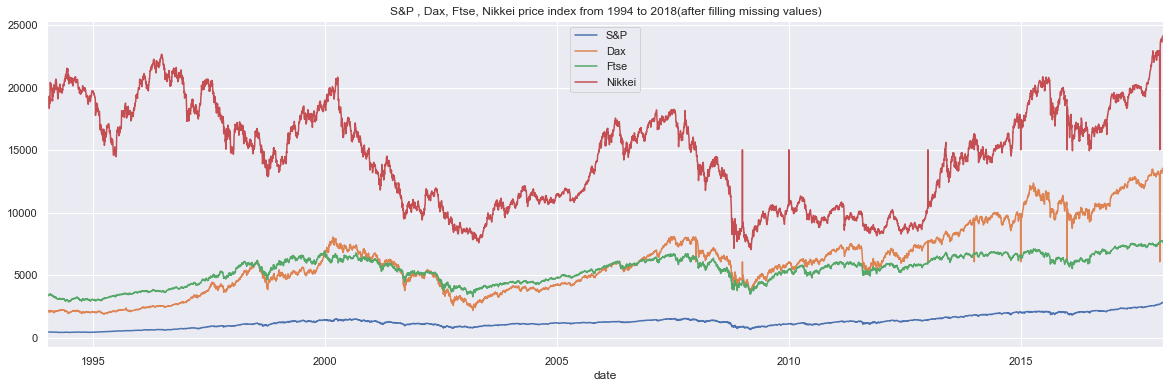

In [70]:
plt.figure(figsize=(20,6))
df_index.spx.plot()
df_index.dax.plot()
df_index.ftse.plot()
df_index.nikkei.plot()
plt.title('S&P , Dax, Ftse, Nikkei price index from 1994 to 2018(after filling missing values)')
plt.legend(['S&P','Dax','Ftse','Nikkei'])
plt.show()

### ***Simplfying The Dataset***
- Adding a column "market_value", which will denote a specific index value from time to time as per requirement.
- For this time market value will contain data of S&P values.
- We will use this market value column for our further analysis on S&P values.

### ***Copying df_index table***

In [71]:
df_market_value=df_index[['spx']]

### ***Renaming spx to market value***
- since we are dealing wiht S&P market index So market value will represent that.

In [72]:
df_market_value.rename(columns={'spx':'market_value'},inplace=True)

C:\Users\adadi\anaconda3\envs\DataScienceEnv\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


### ***Spliting the dataframe df_market_value into training and testing dataframe(80:20)***

In [73]:
traininglen=int(len(df_market_value)*0.8)
testingLen=len(df_market_value)-traininglen

In [74]:
traininglen,testingLen

(5021, 1256)

In [75]:
df_market_value_train=df_market_value.iloc[:traininglen,:]
df_market_value_test=df_market_value.iloc[traininglen:,:]

In [76]:
df_market_value_train.shape,df_market_value_test.shape

((5021, 1), (1256, 1))

## ***White Noice***

- A time series data are called white noice if it satisfies following condition.
- mean should be constant thought out the time seires.
- standard deviation should be the same.
- correlation between any two point in the time series should be near to zero.
- future data can be predicted using past data since absense of pattern in past data.

### ***Creation of white noice***
- Since mean and standard deviation should be constant so we will use mean and std of market value(spx) data for white noice creation.

In [77]:
mean=df_market_value_train['market_value'].mean()
std=df_market_value_train['market_value'].std()

In [78]:
wn=np.random.normal(loc=mean,scale=std,size=len(df_market_value_train))

#### ***Adding white noice column to the df_market_value train***

In [79]:
df_market_value_train['wn']=wn

C:\Users\adadi\AppData\Local\Temp/ipykernel_7400/1961775763.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_market_value_train['wn']=wn


### ***Ploting white noice***

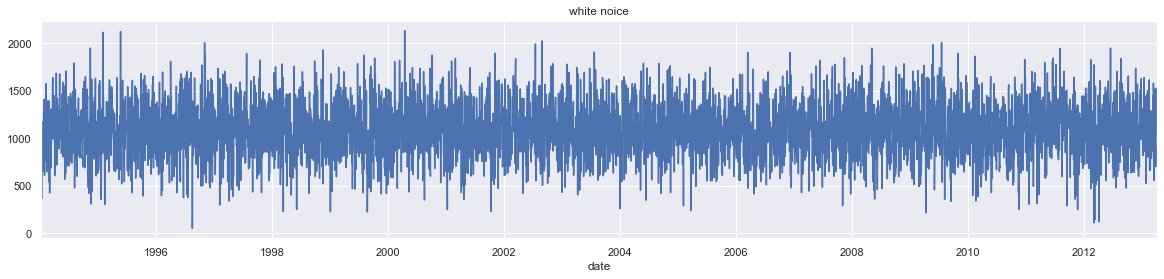

In [80]:
plt.figure(figsize=(20,4))
df_market_value_train.wn.plot()
plt.title('white noice')
plt.show()

#### ***Observation***
- above white noice graph show expected characteristics, since mean and std is constant through out the time series.
- And there is pattern or correlation between any two point with some lag. 

### ***Random Walk***
- Properties
- Xt=X(t-1)+WN()
- This Random Walk is Another time series. in which value of timeseries at t is equal to value at 't-1' with addition to white noice value. 

### Ploting the random walk.

In [81]:
rw=pd.read_csv('RandWalk.csv')
rw.date=pd.to_datetime(rw.date,dayfirst=True)
rw.set_index('date',inplace=True)

In [82]:
df_market_value_train=pd.merge(left=df_market_value_train,right=rw,left_index=True, right_index=True)

In [83]:
df_market_value_train.rename(columns={'price':'rw'},inplace=True)

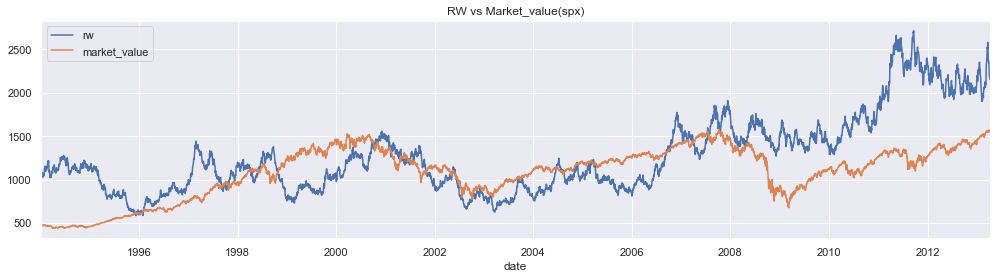

In [84]:
plt.figure(figsize=(17,4))
df_market_value_train.rw.plot()
df_market_value_train.market_value.plot()
plt.title('RW vs Market_value(spx)')
plt.legend()
plt.show()

#### ***Observation***
- Here orange plot is real market value and blue one is Random walk prediction.
- It can be observed that random walk has some resemblance with actual market value.

### ***certain terminology for future reference***
>Market efficiency:
   - It metrics which measure the difficulty to forecast future stock price index data.
> Arbitraze:
   - If predicting future price is very easy then it is called arbitraze.
> Stationarity:
1. Weak form stationarity.
   - seies should have constant mean and variance.
   - covariance(X(t) ,X(t+K)) should be equal to covariance(X(m),X(m+k)).
   - It means convariance between two event that happened in time series data should only depend upon lag between them.
   - White noice comes under this stationarity cause it has constant mean and constant variance. and more importantly covariance between any two event is zero, does not matter when the event happened.
2. strict stationarity.
   - A series is called strict stationary if we take sample of consecutive events and distribution is found out to be same for all similar sample taken in a same way at different.
   - [X ( t1 ) , X ( t1 + k )] ~ Dist ( mean = m, variance = s )
   - [X ( t2 ) , X ( t2 + k )] ~ Dist ( mean = m, variance = s )
3. IN real world it is hard to find time series with strict stationarity. therefore generally stationarity means covariance stationarity or in another term weak form stationarity.


## ***Dicky Fuller Test***

- Dicky Fuller test is used to test the given timeseries data is stationary not.
- it test is done by defining two hypothesis, which are H0 and H1.
- H0 denote null hypothesis. If it is found out to be true then time series will be considered as non stationary.
- H1 denote alternative hypothesis. it is turn out to be true when null hypothesis is false. it implies that time series data are stationary.
- Null hypothese will be rejected if test statics value would be less than critical value.
- critical value is calculated by significance value, which is decided by risk that we can take to reject null hypothesis.
- Dicky fuller test give the following information.
  1. test statistics.
  2. p value obtained using test statiscs
  3. no of lag used in regression.
  4. no of regression used in regression analysis.
  5. { significance level in percentage like 1% ,5% and 10% and their corresponding x axis value which can be compared with test statistics directly}

In [85]:
from statsmodels.tsa.stattools import adfuller

In [86]:
adfuller(df_market_value_train.market_value)

(-1.7369847452352454,
 0.4121645696770613,
 18,
 5002,
 {'1%': -3.431658008603046,
  '5%': -2.862117998412982,
  '10%': -2.567077669247375},
 39904.880607487445)

#### ***Observation and Inference***
- since test statistics value of adfuller test is -1.737 which is greater than -3.43,-2.86,-2.56 So we are unable to reject the null hypothesis.
- It means that time series is considered as non stationary.
- here max lag is taken as 18. it means that analysis has done with max lag of 18.
- pvalue is 0.41 . it means we 41% sure that the series are non stationary.

#### ***Dicky fuller Test for Random Walk***


In [87]:
adfuller(df_market_value_train.rw)

(-1.3286073927689714,
 0.6159849181617386,
 24,
 4996,
 {'1%': -3.4316595802782865,
  '5%': -2.8621186927706463,
  '10%': -2.567078038881065},
 46299.333497595144)

#### ***Observtion***
- by observing adfuller test on random walk data it is clear that random walk is not stationary as well.
- Since test statistics value is -1.32 which is greater critical value taken at 1% 5% and 10% significance level.
- max lag taken for regression analysis  is 24.
- 4996 data taken for analysis.

#### ***Dickey Fuller Test For White Noice***

In [88]:
adfuller(df_market_value_train.wn)

(-70.14375855459737,
 0.0,
 0,
 5020,
 {'1%': -3.431653316130827,
  '5%': -2.8621159253018247,
  '10%': -2.5670765656497516},
 70828.11915841582)

#### ***Observation***
- by performing adfuller test on white noice it is observed that white noice has stationarity.
- Since test statistics value of this test is -70 which is far lesser than -3.43.
- And as there are no pattern exit with past data so max lag 0 is taken. 

### Seasonality
- Event that occuar repeatedly in seaonal basis.
- every time series has three component.
    - seasonal component
    - trend component
    - residual component
### Naive Decomposition 
- One of the process of decomposing the time series into its three component.
- two naive approach.
  - additive : timeseries = seasonal + trend + residual
  - multipicative: timeseries = seasonal * trend * residual


### ***Additive Decomposition***

In [89]:
from statsmodels.tsa.seasonal import seasonal_decompose

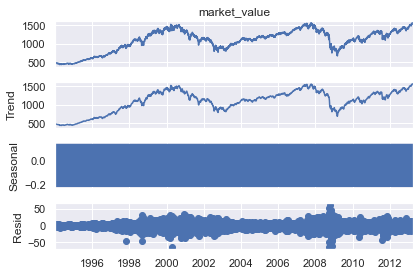

In [90]:
# plt.figure(figsize=(18,5))
marketvalue_decomp=seasonal_decompose(df_market_value_train.market_value, model='additive')
marketvalue_decomp.plot()
plt.show()

#### ***Observation***
- by performing additive decomposition on market value data it is observed that, due to lack of seasonality pattern exist in time series, trend componet is very similar to actual observed data and now prediction of next value is completely depend upon the current value.
- In residual component we can see two bubble cause which bubble created by dot com and house market.

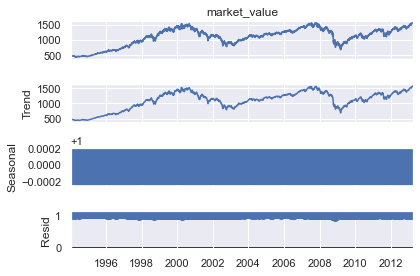

In [91]:
# plt.figure(figsize=(18,5))
marketvalue_decomp=seasonal_decompose(df_market_value_train.market_value, model='multipicative')
marketvalue_decomp.plot()
plt.show()

#### ***Observation***
- by performing multipicative decomposition on market value data it is observed that, due to lack of seasonality pattern exist in time series, trend component is very similar to actual observed data since now prediction of next value is completely depend upon the current value.

### ***Autocorrelation*** 


- Auto correltion is used to find correlation between a current data points all previous data point in time series.
- which can be denoted like this
- corr(X(t),X(t-1)), corr(X(t),X(t-2)), corr(X(t),X(t-3)),....................corr(X(t),X(t-MaxLag_Allowed))
- Overally This series of correlation called AutoCorrelation.
- This is used to find up to how much lag model parameter should be tuned to predict future price accuratelly.
- one of the most important property of this plot is that eventhough we calculate correltion between X(t) and X(t-k) and K belongs Integer. Still X(t-K) can affect the X(t) through all the X(t-l) present between X(t-k) and X(t). where 'l'< K.
- So if we want to calculate direct effect of X(t-K) on X(t) then we have to calculate Partial autocorrelation.

In [92]:
import statsmodels.graphics.tsaplots as sgt

#### ***Autocorrelation Plot***

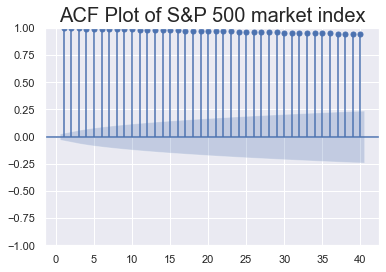

In [93]:

sgt.plot_acf(df_market_value_train.market_value,lags=40,zero=False)
plt.title('ACF Plot of S&P 500 market index',size=20)
plt.show()

#### ***Partial AutoCorrelation Plot***

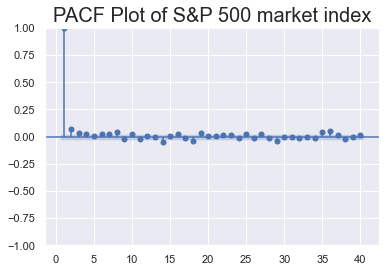

In [94]:
sgt.plot_pacf(df_market_value_train.market_value.values,lags=40,alpha=0.05, zero=False,method='ols')
plt.title('PACF Plot of S&P 500 market index',size=20)
plt.show()

#### ***Obsrvation***
##### ***ACF Plot And PACF Plot***
- By observing auto correlation plot it is clear that every previous data point has significant correlation with currrent data point. so we can take every privious data point upto 40 into account for model building.
- But If we consider partial auto correlation plot it is only last data point which has significant correlation with the current data points.
- And except data point at X(t-1), all the data point has very low direct correlation with X(t). But up to lag around 20 correlation with x(t-k) has more than threshold value of the partial correlation. So we will take lag upto 20 into account of model building.
- Pacf also show some negative correlation with current data point.

## ***Modeling***

- Statistical Model to predict time series data should have following charactersitics.
  1. paramter significance:
     - The coefficient of all model parameters should have significant greater than zero value otherwise it considered as zero.
  2. Parsimonious:
     - Model which is simple to interpret should be selected.
     - Generally Model with less no of parameters is prefered.
     - if complex model perform significantly better than simple model then complex should be preper.
     - Log likelyhood test is used to test the Significance of the performace.
     - This LLR test can be performed only on models with different degree of freedom.
     - But if Models has same no of degree of freedom then Model's information criterion coefficient is compared.
     - lower the infromation criterion less amount of data would be needed to make accurate model.
     - Two most prominent measure of this kind are 'AIC' and 'BIC'.
     - Model would be considered better if residual are behaved as white noice. Reason residual should behave as white noice cause it shows that model already has accounted all the pattern that can help to predict time series data accurately.
  3. over trained model should be avoided.

##### https://besjournals.onlinelibrary.wiley.com/doi/10.1111/j.2041-210X.2010.00063.x`
- Click Above Links for  description about log likelihood ratio test and AIC and BIC .
- Auto regression Model with Ftse index price in next notebook(2.Auto regression)